In [1]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california_housing = fetch_california_housing()

# Print information about the dataset
print(california_housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [2]:
#Data Preprocessing
#Explore and understand the features of dataset
import pandas as pd

california_df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
california_df['target'] = california_housing.target

# Display information about the dataset
print(california_df.info())

# Display statistical summary of the dataset
print(california_df.describe())

# Display the first few rows of the dataset
print(california_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


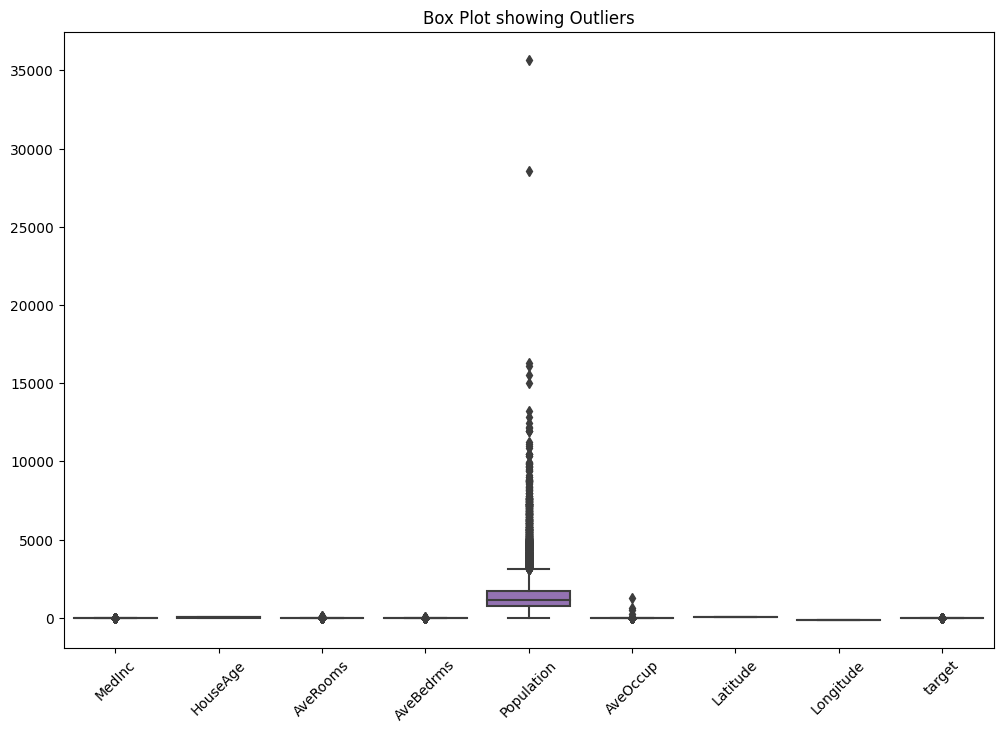

In [3]:
#Handle any missing values or outliers if present
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(california_df.isnull().sum())


# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=california_df)
plt.xticks(rotation=45)
plt.title("Box Plot showing Outliers")
plt.show()


#There is no null values.






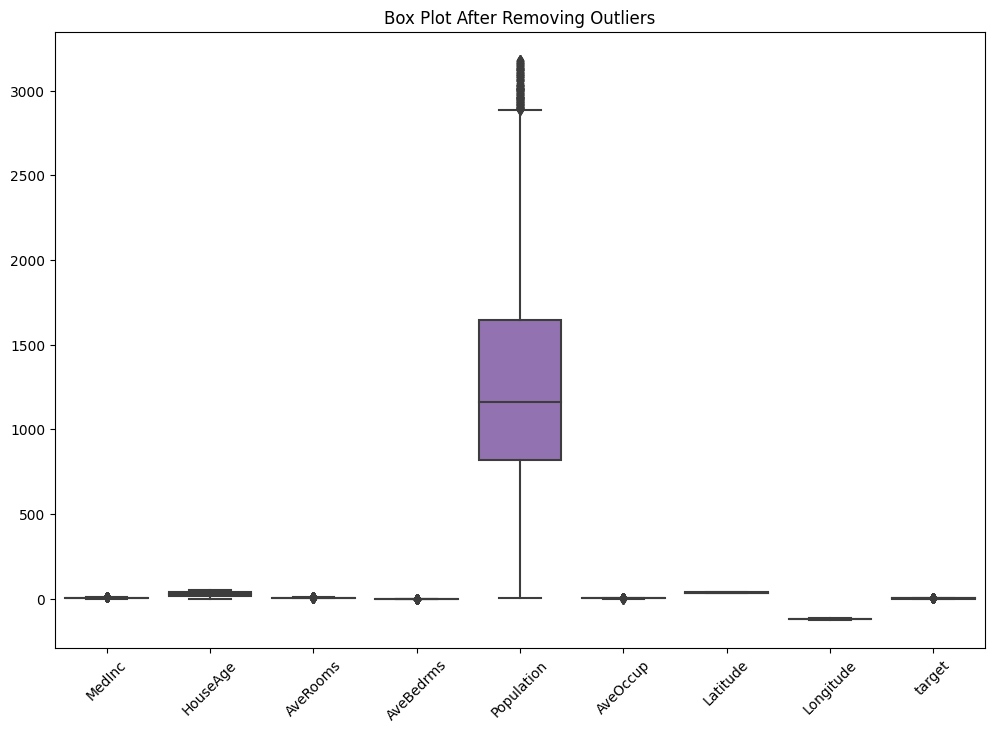

In [4]:
# Removing outliers using IQR
def remove_outliers_iqr(data_frame, column):
    Q1 = data_frame[column].quantile(0.25)
    Q3 = data_frame[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data_frame[column] < lower_bound) | (data_frame[column] > upper_bound)
    return data_frame[~outliers]

# Specify columns for which you want to remove outliers
columns_to_remove_outliers = california_df.columns

# Remove outliers for each column
for column in columns_to_remove_outliers:
    california_df = remove_outliers_iqr(california_df, column)

# Visualize the dataset after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=california_df)
plt.xticks(rotation=45)
plt.title("Box Plot After Removing Outliers")
plt.show()

In [13]:
#Linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the dataset into features (X) and target variable (y)
X = california_df.drop('target', axis=1)
y = california_df['target']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training set
linear_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = linear_model.predict(X_test)
print(y_pred_lr.shape,y_test.shape)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# Display the results
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Training set shape: (12985, 8) (12985,)
Testing set shape: (3247, 8) (3247,)
(3247,) (3247,)
Mean Squared Error (MSE): 0.3146760712687007
R2 Score: 0.6241786277437549


In [6]:
#Artificial Neural Network (ANN)

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California housing dataset and split into training and testing sets
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training set
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions on the testing set
y_pred_ann = model.predict(X_test_scaled).flatten()

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_ann)
r2 = r2_score(y_test, y_pred_ann)

# Display the results
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Epoch 1/50
465/465 [==============================] - 3s 4ms/step - loss: 1.6727 - val_loss: 0.6191
Epoch 2/50
465/465 [==============================] - 2s 4ms/step - loss: 0.5253 - val_loss: 0.4875
Epoch 3/50
465/465 [==============================] - 2s 4ms/step - loss: 0.4312 - val_loss: 0.4585
Epoch 4/50
465/465 [==============================] - 2s 4ms/step - loss: 0.4024 - val_loss: 0.4327
Epoch 5/50
465/465 [==============================] - 2s 3ms/step - loss: 0.3861 - val_loss: 0.4229
Epoch 6/50
465/465 [==============================] - 1s 2ms/step - loss: 0.3774 - val_loss: 0.4442
Epoch 7/50
465/465 [==============================] - 1s 2ms/step - loss: 0.3737 - val_loss: 0.4029
Epoch 8/50
465/465 [==============================] - 1s 2ms/step - loss: 0.3610 - val_loss: 0.3985
Epoch 9/50
465/465 [==============================] - 1s 3ms/step - loss: 0.3554 - val_loss: 0.3908
Epoch 10/50
465/465 [==============================] - 2s 3ms/step - loss: 0.3551 - val_loss: 0.3879

(4128,)
(4128,)


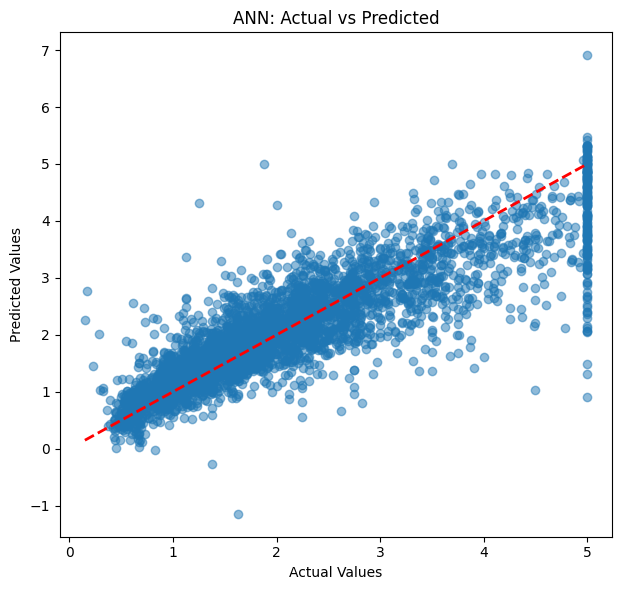

In [11]:
#Create visualizations (e.g., scatter plots, line plots) to compare the predicted values of the two models with the actual values.

# Scatter plot for ANN
print(y_test.shape)
print(y_pred_ann.shape)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ann, alpha=0.5)
plt.title('ANN: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.tight_layout()
plt.show()


(3247,)
(3247,)


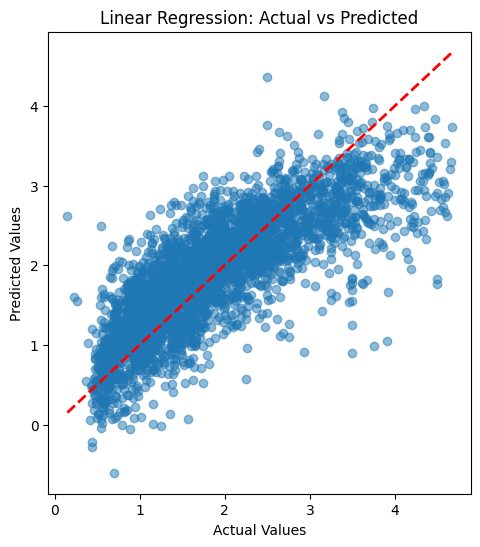

In [14]:
# Scatter plot for Linear Regression

print(y_test.shape)
print(y_pred_lr.shape)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
